# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = {"q": city, "units": "metric", "APPID": weather_api_key}

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params = city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | greymouth
Processing Record 6 of Set 1 | szczytno
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | cestos city
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | balykshi
Processing Record 14 of Set 1 | aswan
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | pontianak
Processing Record 18 of Set 1 | ranau
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | castelldefels
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | hasaki
Proce

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,17.91,94,100,5.89,SH,1736468686
1,iqaluit,63.7506,-68.5145,-16.15,84,100,1.54,CA,1736468687
2,west island,-12.1568,96.8225,23.99,94,75,4.12,CC,1736468688
3,port-aux-francais,-49.3500,70.2167,4.31,93,100,23.76,TF,1736468690
4,greymouth,-42.4667,171.2000,18.09,77,81,2.93,NZ,1736468691


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,17.91,94,100,5.89,SH,1736468686
1,iqaluit,63.7506,-68.5145,-16.15,84,100,1.54,CA,1736468687
2,west island,-12.1568,96.8225,23.99,94,75,4.12,CC,1736468688
3,port-aux-francais,-49.3500,70.2167,4.31,93,100,23.76,TF,1736468690
4,greymouth,-42.4667,171.2000,18.09,77,81,2.93,NZ,1736468691


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

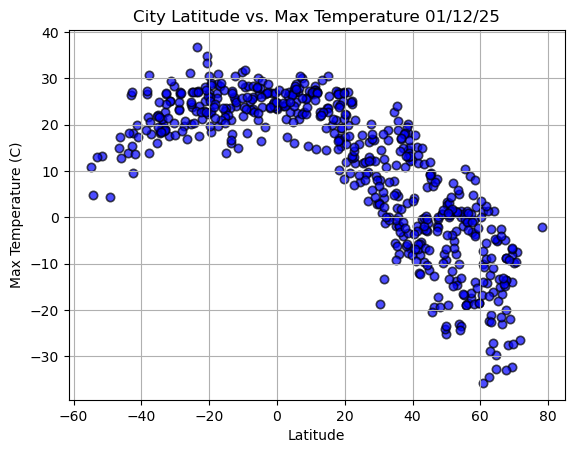

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], 
            c='blue', edgecolors='black', marker='o', alpha=0.7, linewidths=1.2, label="City Data")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

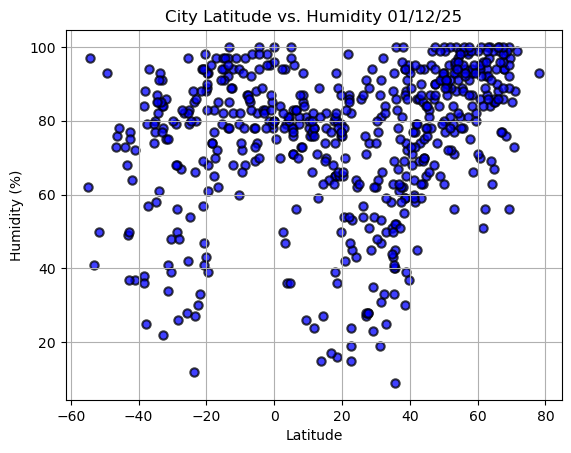

In [59]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], 
            c = 'blue', edgecolors='black', marker='o', 
            linewidth=1.5, alpha=0.75, label='City Data')


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

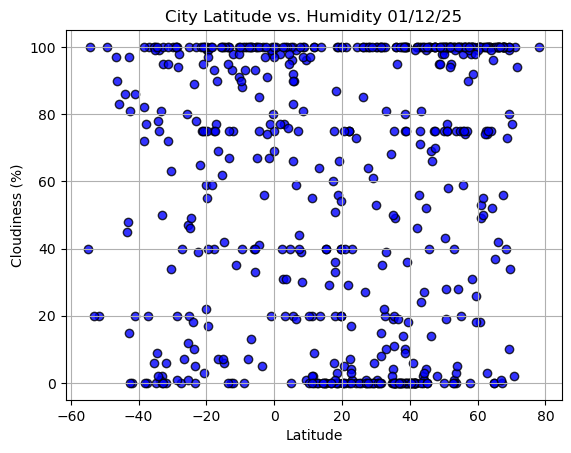

In [35]:
# Extract data for latitude and cloudiness
latitudes = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Plot the data with different parameters
scatter = plt.scatter(latitudes, cloudiness, 
                      c="blue", edgecolors="black", 
                      alpha=0.8, marker="o", linewidth=1, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

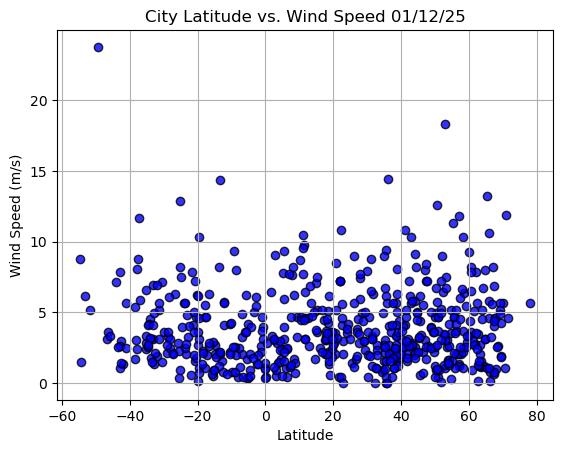

In [36]:
# Extract latitude and wind speed data
latitudes = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

# Create the scatter plot
scatter_plot = plt.scatter(latitudes, wind_speed, 
                           c="blue", edgecolors="black", 
                           alpha=0.8, marker="o", linewidth=1, label="City Wind Speed")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_data, y_data, x_label, y_label, text_position):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    # Define regression values
    regression_line = slope * x_data + intercept

    # Create line equation
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Annotate linear equation
# Annotate the equation in the upper-right corner (outside the plot area)
    plt.annotate(equation, 
                 xy=(1, 1),  # Coordinates: 1,1 corresponds to the upper-right corner
                 xycoords='axes fraction',  # Use axes fraction (0 to 1)
                 fontsize=14, color="red", ha="right", va="top")
        
    # Create scatter plot
    plt.scatter(x_data, y_data, color="blue", alpha=0.7, edgecolors="black")
    
    # Create regression line
    plt.plot(x_data, regression_line, color="red", linewidth=2)   
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs {y_label}")

    # Print r-squared value
    print(f"R-squared value is: {r_value**2:.3f}")
    
    # Show plot
    plt.show()

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,-16.15,84,100,1.54,CA,1736468687
5,szczytno,53.5626,20.9875,4.96,93,75,2.57,PL,1736468429
8,yellowknife,62.4560,-114.3525,-22.47,92,75,5.66,CA,1736468695
10,cestos city,5.4600,-9.5828,27.24,78,100,3.94,LR,1736468698
11,college,64.8569,-147.8028,-5.01,85,100,3.09,US,1736468699


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,17.91,94,100,5.89,SH,1736468686
2,west island,-12.1568,96.8225,23.99,94,75,4.12,CC,1736468688
3,port-aux-francais,-49.3500,70.2167,4.31,93,100,23.76,TF,1736468690
4,greymouth,-42.4667,171.2000,18.09,77,81,2.93,NZ,1736468691
6,papatowai,-46.5619,169.4708,14.92,73,97,3.13,NZ,1736468693


###  Temperature vs. Latitude Linear Regression Plot

R-squared value is: 0.700


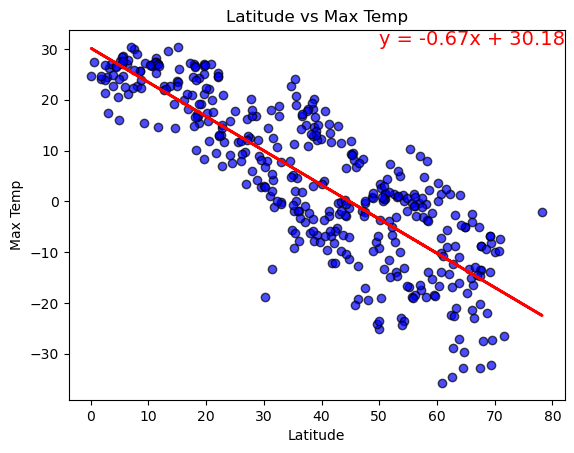

In [50]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df["Lat"]  # X-axis values: Latitude
y_data = northern_hemi_df["Max Temp"]  # Y-axis values: Max Temperature
x_axis_label = "Latitude"  # X-axis label
y_axis_label = "Max Temp"  # Y-axis label

plot_linear_regression(x_data, y_data, x_axis_label, y_axis_label, (8, 5))  # Plot the regression


R-squared value is: 0.242


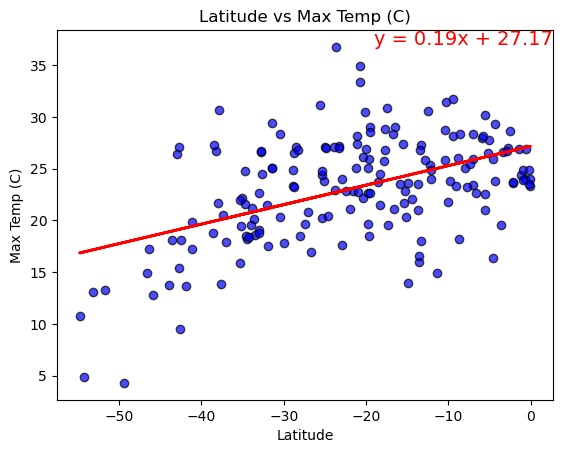

In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp (C)"

plot_linear_regression(x_values, y_values, x_label, y_label, (-55, 28))

**Discussion about the linear relationship:** 
The scatter plots and linear correlations above show a weak relationship between latitude (x-axis) and humidity (%) (y-axis) in both the northern (top) and southern (bottom) hemispheres. The R-squared value of 0.242 suggests that only about 24% of the variation in humidity can be explained by latitude, indicating a minimal linear correlation between the two variables.

### Humidity vs. Latitude Linear Regression Plot

R-squared value is: 0.152


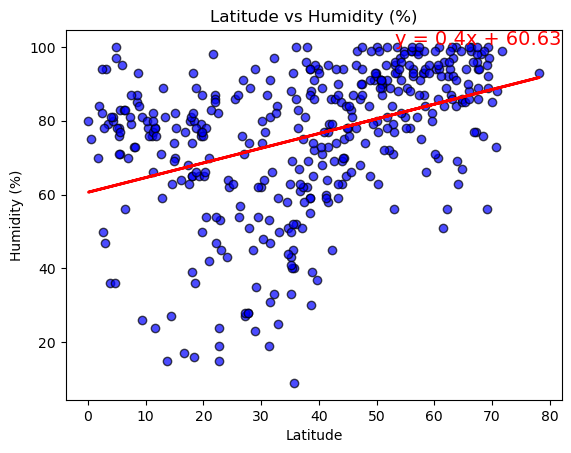

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] # Set x axis
y_values = northern_hemi_df["Humidity"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Humidity (%)" # Set y label

plot_linear_regression(x_values, y_values, x_label, y_label, (45, 10)) # Run function defined above 

R-squared value is: 0.138


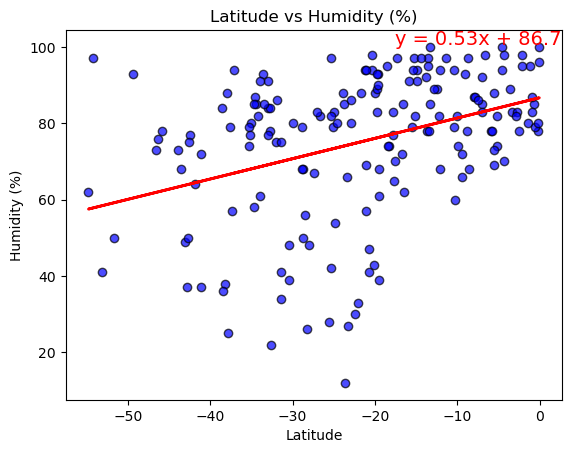

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] # Set x axis
y_values = southern_hemi_df["Humidity"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Humidity (%)" # Set y label

plot_linear_regression(x_values, y_values, x_label, y_label, (-55, 25)) # Run function defined above     

**Discussion about the linear relationship:** 
The scatter plots and linear correlations above show a very weak relationship between latitude (x-axis) and cloudiness (%) (y-axis) in both hemispheres. With an R-squared value of 0.138, only about 14% of the variation in cloudiness can be explained by latitude, suggesting that latitude has minimal influence on cloudiness in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

R-squared value is: 0.061


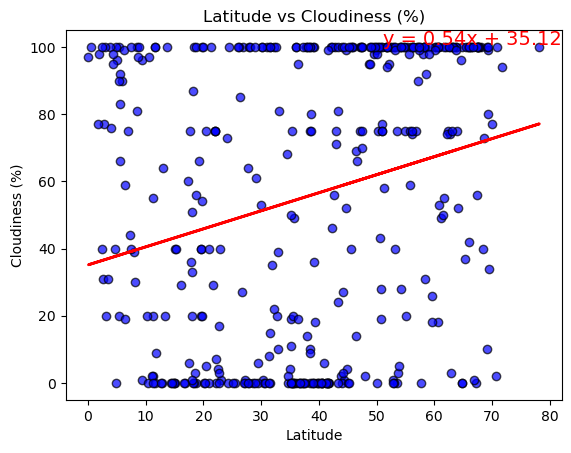

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] # Set x axis
y_values = northern_hemi_df["Cloudiness"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Cloudiness (%)" # Set y label

plot_linear_regression(x_values, y_values, x_label, y_label, (45, 22)) # Run function defined above 

R-squared value is: 0.039


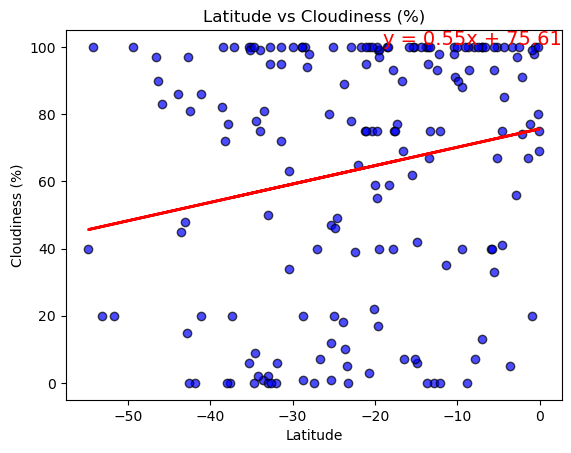

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] # Set x axis
y_values = southern_hemi_df["Cloudiness"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Cloudiness (%)" # Set y label

plot_linear_regression(x_values, y_values, x_label, y_label, (-55, 15)) # Run function defined above 

**Discussion about the linear relationship:** 
The scatter plots and linear regression results reveal no significant relationship between latitude (x-axis) and cloudiness (%) (y-axis) in either hemisphere. With an R-squared value of 0.039, only 3.9% of the variation in cloudiness can be explained by latitude, indicating an extremely weak correlation between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared value is: 0.001


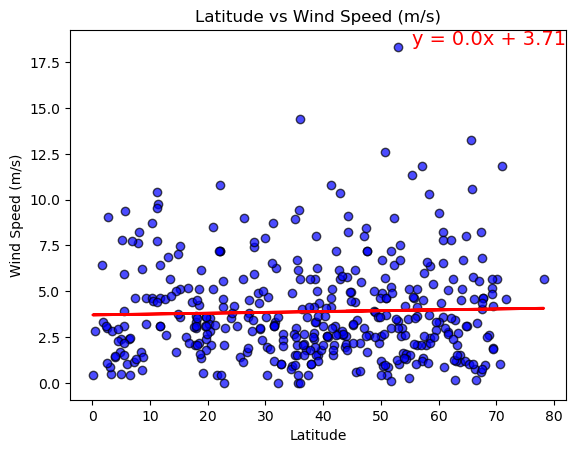

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] # Set x axis
y_values = northern_hemi_df["Wind Speed"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Wind Speed (m/s)" # Set y label

plot_linear_regression(x_values, y_values, x_label, y_label, (5, 12)) # Run function defined above 

R-squared value is: 0.070


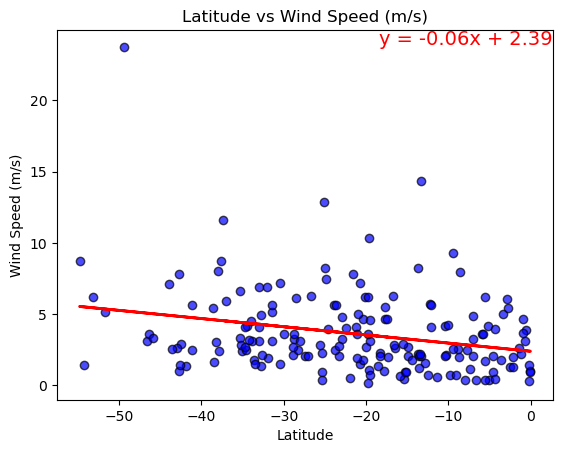

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] # Set x axis
y_values = southern_hemi_df["Wind Speed"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Wind Speed (m/s)" # Set y label

plot_linear_regression(x_values, y_values, x_label, y_label, (-55, 17.5)) # Run function defined above 

**Discussion about the linear relationship:** 
The scatter plots and linear correlations show no clear relationship between latitude (x-axis) and wind speed (m/s) (y-axis) in either hemisphere. With an R-squared value of 0.070, only 7% of the variation in wind speed can be explained by latitude, indicating a very weak correlation between the two variables.